# Sistem Rekomendasi Film Berbasis Content-based Filtering

- **Nama:** Raka Satria Efendi
- **Email:** rakaefendi1683@gmail.comrakaefendi1683
- **USER/ID Dicoding:** rakasatriaefendi

# Project Overview


Film merupakan salah satu bentuk hiburan utama di era digital, dengan platform streaming seperti Netflix dan Disney+ menjadi pusat distribusi konten. Dengan ribuan film yang tersedia, pengguna sering kali kesulitan menemukan film yang sesuai dengan preferensi mereka. Sistem rekomendasi menjadi kunci untuk meningkatkan pengalaman pengguna dengan menyarankan film yang relevan berdasarkan karakteristik konten, seperti genre, deskripsi, aktor, atau sutradara.

Dataset TMDB 5000 Movie Dataset menyediakan informasi kaya tentang film, termasuk genre, deskripsi (overview), kata kunci, aktor, dan sutradara. Dataset ini memungkinkan analisis karakteristik film untuk membangun sistem rekomendasi berbasis **Content-based Filtering**, yang merekomendasikan film berdasarkan kesamaan fitur konten dengan film yang disukai pengguna.

Proyek ini bertujuan untuk mengembangkan sistem rekomendasi film yang akurat dan relevan, membantu pengguna menemukan film yang sesuai dengan preferensi mereka serta meningkatkan retensi dan kepuasan di platform streaming.

# Business Understanding

## Problem Statements

Berdasarkan latar belakang di atas, rumusan masalah dari proyek ini adalah:
1. Bagaimana cara membangun sistem rekomendasi film yang relevan berdasarkan karakteristik konten seperti genre, deskripsi, aktor, dan sutradara?
2. Fitur apa saja yang paling berpengaruh dalam menentukan kemiripan antar film?
3. Bagaimana cara mengevaluasi efektivitas sistem rekomendasi untuk memastikan rekomendasi yang dihasilkan relevan?

## Goals

Berdasarkan problem statements, berikut tujuan yang ingin dicapai pada proyek ini:

1. **Mengidentifikasi TOP 10 cast** dalam dataset TMDB 5000 Movie Dataset untuk memahami aktor yang paling sering muncul atau populer, yang dapat menjadi salah satu elemen penting dalam sistem rekomendasi film.
   
2. **Menganalisis faktor yang mempengaruhi kemiripan antar film**, dengan fokus pada fitur seperti genre, deskripsi (`overview`), aktor (`cast`), dan sutradara (`director`), untuk mengetahui kontribusi masing-masing fitur dalam menentukan relevansi rekomendasi.

3. **Mengembangkan sistem rekomendasi film terbaik yang dapat diimplementasikan**, menggunakan pendekatan berbasis **Content-based Filtering**, serta memastikan sistem tersebut memberikan rekomendasi yang relevan dan dapat dievaluasi dengan metrik sederhana.


## Solution Approach

Untuk mencapai tujuan tersebut, solution statements yang diusulkan adalah:
Untuk mencapai tujuan tersebut, solution statements yang diusulkan adalah:

1. **Mengidentifikasi TOP 10 cast** dengan mengekstrak data dari kolom `cast` dalam dataset TMDB 5000 Movie Dataset, lalu menghitung frekuensi kemunculan aktor menggunakan teknik seperti `Counter` untuk menampilkan aktor paling populer.

2. **Menganalisis faktor yang mempengaruhi kemiripan antar film** dengan:
   - Menggunakan **TF-IDF Vectorizer** untuk mengekstrak fitur numerik dari kolom `keywords` dan `overview`, serta mengidentifikasi kata atau frasa yang paling berpengaruh terhadap kemiripan.
   - Menganalisis distribusi fitur seperti `genres`, `cast`, dan `director` untuk memahami kontribusi masing-masing fitur terhadap kemiripan antar film.

3. **Membangun sistem rekomendasi terbaik yang dapat diimplementasikan** dengan langkah-langkah berikut:
   - Melakukan preprocessing teks pada kolom `keywords` dan `overview` untuk memastikan data bersih dan konsisten.
   - Menggunakan **TF-IDF Vectorizer** untuk merepresentasikan fitur teks secara numerik, lalu menghitung kemiripan antar film dengan algoritma **cosine similarity**.
   - Mengevaluasi sistem rekomendasi secara sederhana dengan menggunakan ground truth untuk menghitung metrik seperti **Precision@5**, serta memverifikasi relevansi rekomendasi secara kualitatif berdasarkan tema dan genre film.


# Data Understanding

Tahap ini merupakan proses analisis data yang bertujuan untuk memperoleh pemahaman yang menyeluruh mengenai dataset sebelum melanjutkan ke tahap analisis lebih lanjut.

## 1. Mengimport Library


Pada bagian ini kita mengimport seluruh library yang diperlukan untuk menganalisis

In [1]:
!pip install kaggle --quiet

In [2]:
!pip install keras --quiet

In [3]:
!pip install WordCloud --quiet

In [73]:
# File dan Data Handling
import os
import shutil
import zipfile
import json
import pandas as pd
import numpy as np
import ast
import json
import re

# Preprocessing Teks
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder, OneHotEncoder, StandardScaler
from nltk.stem import PorterStemmer
from collections import Counter

# Modeling
from sklearn.metrics.pairwise import cosine_similarity

# Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Deep Learning (opsional, untuk eksperimen tambahan)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Evaluasi (opsional, untuk eksperimen klasifikasi)
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

# Mengatasi Warning
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

# Download data NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## Data Loading

Tahap untuk memuat dataset yang akan digunakan agar dataset lebih mudah dipahami. Pada project kali ini, menggunakan dataset yang berasal dari Kaggle. [Link Dataset](https://www.kaggle.com/datasets/asaniczka/top-spotify-songs-in-73-countries-daily-updated)

In [5]:
#!/bin/bash
!curl -L -o tmdb_movie_metadata.zip\
  "https://www.kaggle.com/api/v1/datasets/download/tmdb/tmdb-movie-metadata"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 9099k  100 9099k    0     0   9.8M      0 --:--:-- --:--:-- --:--:--  9.8M


In [6]:
#membuka zip menjadi folder
with zipfile.ZipFile("tmdb_movie_metadata.zip", "r") as zip_ref:
    zip_ref.extractall("tmdb_data")

# Membaca kedua file CSV dari folder 'tmdb_data'
movies = pd.read_csv("tmdb_data/tmdb_5000_movies.csv")
credits = pd.read_csv("tmdb_data/tmdb_5000_credits.csv")

In [7]:
movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [8]:
credits

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [9]:
print("Data dari tmdb_5000_movies.csv:")
display(movies.head())

Data dari tmdb_5000_movies.csv:


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [10]:
print("Data dari tmdb_5000_credits.csv:")
display(credits.head())

Data dari tmdb_5000_credits.csv:


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### Gabungkan dataset movies.csv dan credits.csv

In [11]:
# Gabungkan dataset berdasarkan id
movies = movies.merge(credits[['movie_id', 'cast', 'crew']], left_on='id', right_on='movie_id', how='left')
movies = movies.drop(columns=['movie_id'])

In [12]:
# Pilih kolom yang relevan untuk Content-based Filtering
movies = movies[['id', 'title', 'genres', 'overview', 'keywords', 'cast', 'crew']].dropna(subset=['genres', 'overview'])

In [13]:
print("\nJumlah baris dan kolom:", movies.shape)


Jumlah baris dan kolom: (4800, 7)


**Insight:**

- **Jumlah Data**: Dataset memiliki **4800 baris** (entri film) dan **7 kolom**

In [14]:
# Menampilkan info dataset gabungan
print("Info Dataset Gabungan:")
print(movies.info())

Info Dataset Gabungan:
<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4802
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        4800 non-null   int64 
 1   title     4800 non-null   object
 2   genres    4800 non-null   object
 3   overview  4800 non-null   object
 4   keywords  4800 non-null   object
 5   cast      4800 non-null   object
 6   crew      4800 non-null   object
dtypes: int64(1), object(6)
memory usage: 300.0+ KB
None


**Insight:**

Berdasarkan output info dataset gabungan:
- **Jumlah Data**: Dataset berisi **4800 entri** film, yang cukup besar untuk membangun sistem rekomendasi berbasis **Content-based Filtering**.
- **Kolom**: Terdapat **7 kolom** (`id`, `title`, `genres`, `overview`, `keywords`, `cast`, `crew`) dengan tipe data:
  - `id`: Numerik (int64), digunakan untuk identifikasi unik film.
  - Kolom lainnya (`title`, `genres`, `overview`, `keywords`, `cast`, `crew`): Bertipe object (string), cocok untuk preprocessing teks dan ekstraksi fitur.
- **Kelengkapan Data**: Tidak ada missing values di semua kolom (masing-masing memiliki 4800 non-null entries), menunjukkan dataset sudah bersih setelah penggabungan dan pembersihan awal.
- **Penggunaan Memori**: Sekitar **300 KB**, yang relatif ringan dan memungkinkan pemrosesan cepat untuk analisis dan modeling.
- **Implikasi untuk Proyek**: Dataset ini siap untuk tahap **Data Preparation** (parsing JSON, preprocessing teks) dan **Modeling** (menggunakan TF-IDF dan cosine similarity), karena semua fitur relevan tersedia dan lengkap.


### Deskripsi variable

Berikut adalah arti dari variabel-variabel pada data tersebut:

| Variabel      | Tipe Data | Keterangan                                                                 |
|---------------|-----------|---------------------------------------------------------------------------|
| `id`          | int64     | ID unik untuk setiap film dalam database TMDB.                            |
| `title`       | object    | Judul film, digunakan untuk identifikasi dan menampilkan rekomendasi.     |
| `genres`      | object    | Daftar genre film dalam format JSON (misalnya, [{"id": 28, "name": "Action"}]). Menunjukkan kategori film seperti Action, Drama, atau Comedy. |
| `overview`    | object    | Deskripsi singkat tentang alur atau tema film, digunakan untuk ekstraksi fitur teks. |
| `keywords`    | object    | Kata kunci yang terkait dengan film dalam format JSON (misalnya, [{"id": 1463, "name": "superhero"}]). Menjelaskan tema atau elemen kunci film. |
| `cast`        | object    | Daftar aktor yang bermain dalam film dalam format JSON (misalnya, [{"name": "Christian Bale"}]). Digunakan untuk menambah fitur rekomendasi. |
| `crew`        | object    | Daftar kru film dalam format JSON, termasuk sutradara (misalnya, [{"job": "Director", "name": "Christopher Nolan"}]). Digunakan untuk ekstraksi sutradara sebagai fitur. |

### Deskripsi Statistik dari Data

In [15]:
# Membuat dataframe
df_filtered = pd.DataFrame(movies)

In [16]:
# Memanggil untuk statistik data mengecek outlier.
df_filtered.describe()

,id
count,4800.000000
mean,56967.252917
std,88350.548128
min,5.000000
25%,9012.750000
50%,14623.500000
75%,58512.500000
max,447027.000000


**Penjelasan Fungsi describe()**
Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, antara lain:
- `Count`: Jumlah sampel pada data.
- `Mean`: Nilai rata-rata.
- `Std`: Standar deviasi.
- `Min`: Nilai minimum setiap kolom.
- `25%`: Kuartil pertama, menandai batas interval 25% data terendah.
- `50%`: Kuartil kedua atau median (nilai tengah).
- `75%`: Kuartil ketiga, menandai batas interval 75% data terendah.
- `Max`: Nilai maksimum.

**Insight kolom id:**

| Aspek                     | Nilai/Insight                                                                     |
| ------------------------- | --------------------------------------------------------------------------------- |
| **Jumlah Entri**          | 4800 entri → cakupan data cukup besar untuk sistem rekomendasi                    |
| **Rata-rata ID**          | Sekitar 56,967                                                                    |
| **Standar Deviasi**       | Tinggi (±88,350) → menunjukkan variasi besar antar ID                             |
| **Nilai Minimum**         | 5 → ID terkecil                                                                   |
| **Nilai Maksimum**        | 447,027 → ID terbesar                                                             |
| **Median**                | 14,623.5 → jauh lebih kecil dari rata-rata                                        |
| **Kesimpulan Distribusi** | Distribusi tidak simetris (positively skewed), banyak ID berada di rentang rendah |


## Exploratory Data Analysis

### Analisis Missing Values dan Duplikat

In [ ]:
print("1. Analisis Missing Values dan Duplikat")
print("Missing Values:\n", df_filtered.isnull().sum())
print("\nJumlah Duplikat berdasarkan title:", df_filtered.duplicated(subset=['title']).sum())

1. Analisis Missing Values dan Duplikat
Missing Values:
 id          0
title       0
genres      0
overview    0
keywords    0
cast        0
crew        0
dtype: int64

Jumlah Duplikat berdasarkan title: 3


**Insight:**
Tidak ada missing values di kolom utama, memastikan dataset siap untuk analisis. Duplikat title perlu diperiksa lebih lanjut untuk memastikan tidak ada data ganda."

### Distribusi Film Berdasarkan Genre


 Distribusi Film Berdasarkan Genre


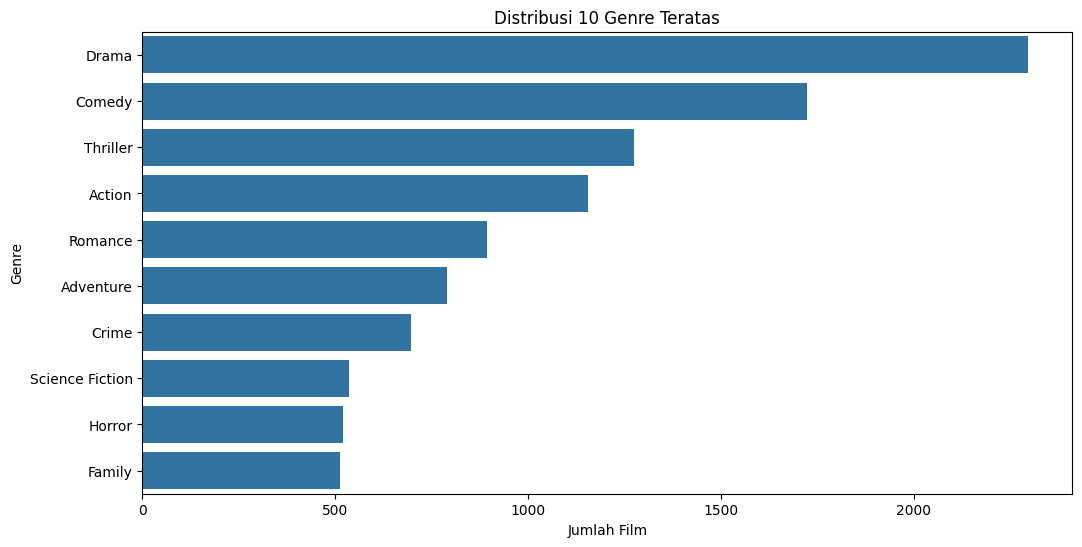

In [18]:
print("\n Distribusi Film Berdasarkan Genre")
def parse_genres(genres_str):
    try:
        genres = json.loads(genres_str.replace("'", "\""))  # Menangani kutipan tunggal
        return [genre['name'] for genre in genres]
    except:
        return []

df_filtered['genres_list'] = df_filtered['genres'].apply(parse_genres)
all_genres = [genre for genres in df_filtered['genres_list'] for genre in genres]
genre_counts = pd.Series(all_genres).value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values[:10], y=genre_counts.index[:10])
plt.title('Distribusi 10 Genre Teratas')
plt.xlabel('Jumlah Film')
plt.ylabel('Genre')
plt.show()

**Insight:**
Genre Drama dan Comedy mendominasi dataset (~40% dari total film), menunjukkan popularitas tinggi. Ini dapat memengaruhi rekomendasi untuk pengguna yang menyukai genre mainstream.

### Jumlah Film Berdasarkan Panjang Sinopsis (Overview)


 Jumlah Film Berdasarkan Panjang Sinopsis (Overview)


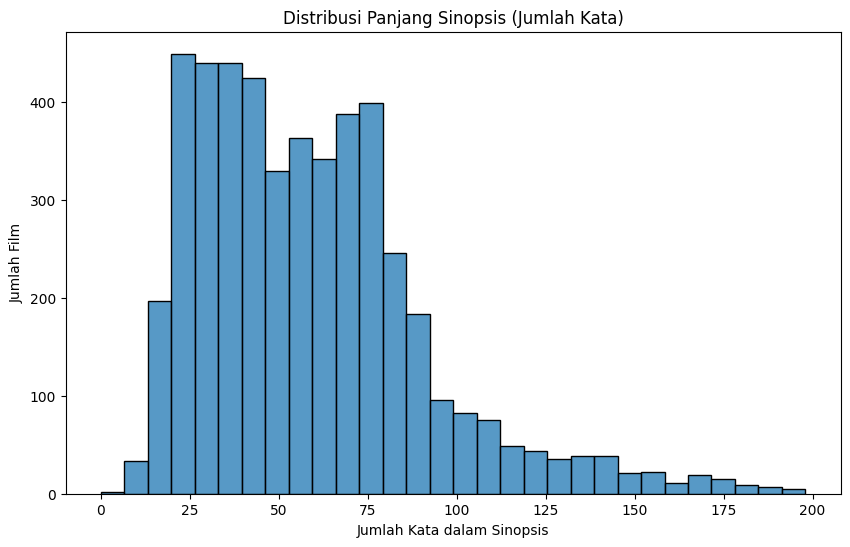

In [19]:
print("\n Jumlah Film Berdasarkan Panjang Sinopsis (Overview)")
df_filtered['overview_length'] = df_filtered['overview'].apply(lambda x: len(word_tokenize(x)) if isinstance(x, str) else 0)

plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['overview_length'], bins=30)
plt.title('Distribusi Panjang Sinopsis (Jumlah Kata)')
plt.xlabel('Jumlah Kata dalam Sinopsis')
plt.ylabel('Jumlah Film')
plt.show()

**Insight:**
- Mayoritas sinopsis film memiliki panjang antara 20 hingga 80 kata, dengan puncak sekitar 30 kata dan 60-70 kata. Ini menunjukkan bahwa sinopsis cenderung ringkas.

- Sebagian besar sinopsis memiliki 20-60 kata, tetapi ada sinopsis pendek (<10 kata) yang berpotensi kurang informatif untuk ekstraksi fitur TF-IDF, sehingga perlu penanganan khusus.

### Top 20 Aktor Paling Sering Muncul


 Top 20 Aktor Paling Sering Muncul


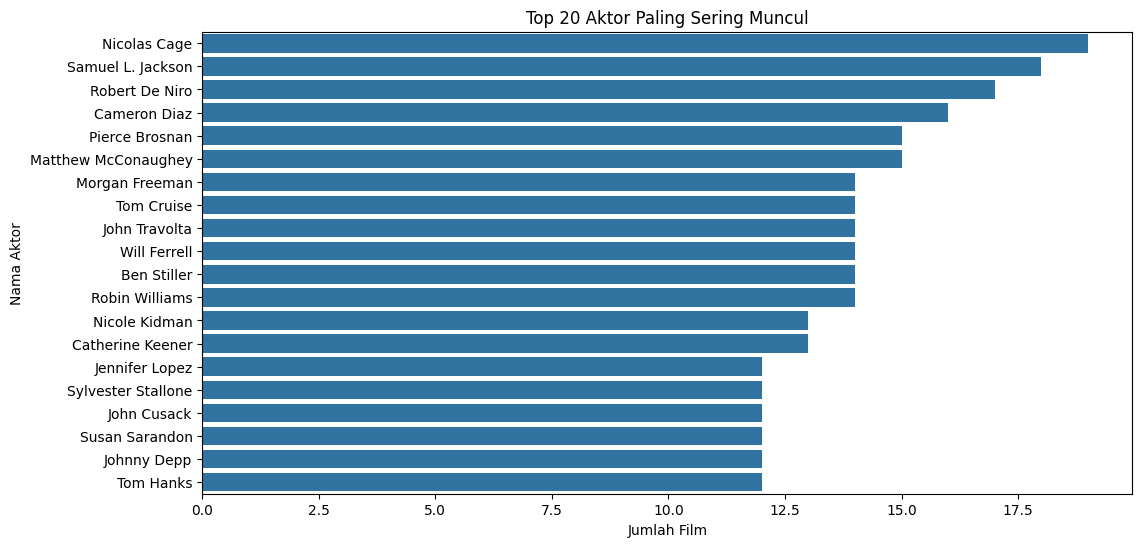

In [20]:
print("\n Top 20 Aktor Paling Sering Muncul")
def parse_cast(cast_str):
    try:
        cast = json.loads(cast_str.replace("'", "\""))  # Menangani kutipan tunggal
        return [actor['name'] for actor in cast[:3]]  # Ambil 3 aktor utama
    except:
        return []

df_filtered['cast_list'] = df_filtered['cast'].apply(parse_cast)
all_actors = [actor for cast in df_filtered['cast_list'] for actor in cast]
actor_counts = pd.Series(all_actors).value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=actor_counts.values[:20], y=actor_counts.index[:20])
plt.title('Top 20 Aktor Paling Sering Muncul')
plt.xlabel('Jumlah Film')
plt.ylabel('Nama Aktor')
plt.show()

**Insight:**
Nicolas Cage adalah aktor yang paling sering muncul dalam film, diikuti oleh Samuel L. Jackson dan Robert De Niro. Ini mengindikasikan produktivitas atau popularitas mereka dalam industri film.

### Analisis Kata Kunci (Keywords) Paling Populer


 Analisis Kata Kunci Paling Populer


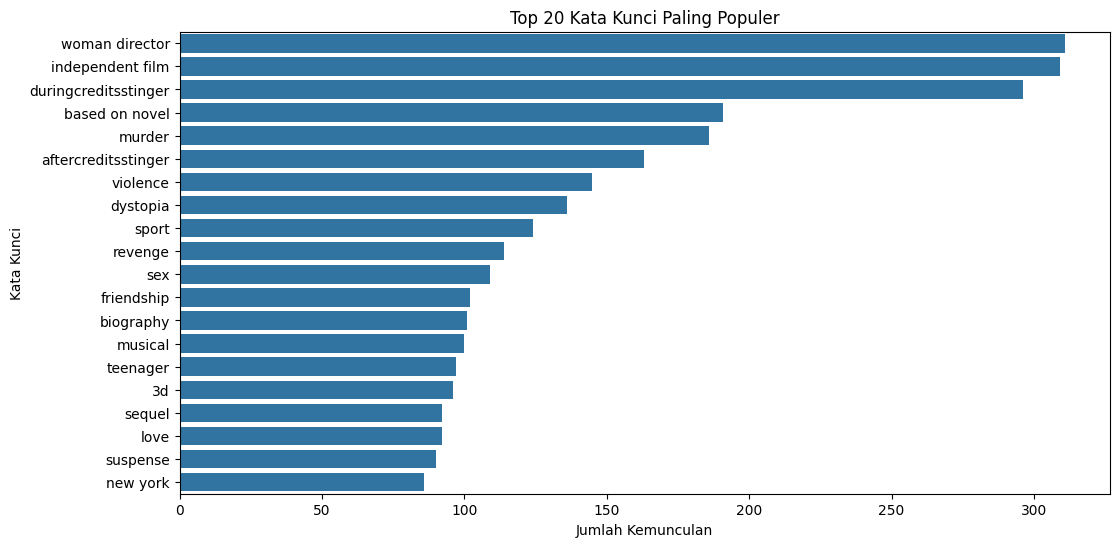

In [21]:
print("\n Analisis Kata Kunci Paling Populer")
def parse_keywords(keywords_str):
    try:
        keywords = json.loads(keywords_str.replace("'", "\""))  # Menangani kutipan tunggal
        return [keyword['name'] for keyword in keywords]
    except:
        return []

df_filtered['keywords_list'] = df_filtered['keywords'].apply(parse_keywords)
all_keywords = [keyword for keywords in df_filtered['keywords_list'] for keyword in keywords]
keyword_counts = pd.Series(all_keywords).value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=keyword_counts.values[:20], y=keyword_counts.index[:20])
plt.title('Top 20 Kata Kunci Paling Populer')
plt.xlabel('Jumlah Kemunculan')
plt.ylabel('Kata Kunci')
plt.show()

**Insight:**
 "woman director" dan "independent film" adalah dua kata kunci paling populer. Ini bisa mencerminkan tren atau fokus dalam produksi film yang dianalisis, seperti peningkatan peran sutradara wanita atau produksi film independen.

### Word Cloud untuk Kata Kunci

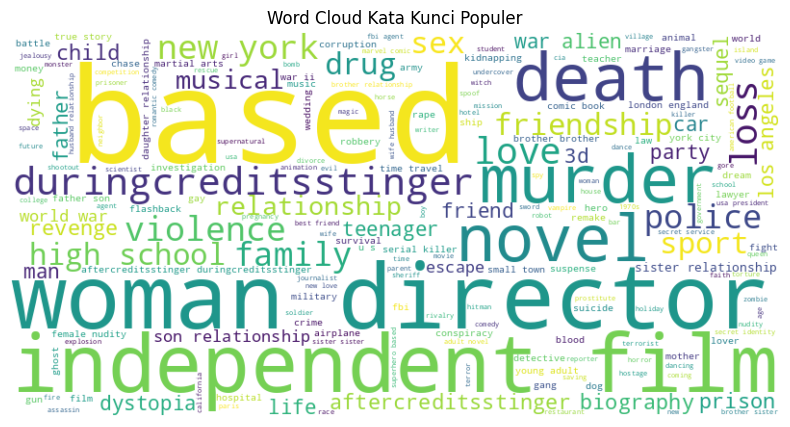

In [22]:
keyword_text = ' '.join(all_keywords)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keyword_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Kata Kunci Populer')
plt.show()

**Insight:**
Word cloud mengkonfirmasi dominasi kata kunci seperti "murder," "based," "independent," "director," "violence," dan "novel," memberikan gambaran visual tentang tema dan elemen yang sering muncul dalam film.

### Distribusi Film Berdasarkan Peran Sutradara

Distribusi Film Berdasarkan Peran Sutradara


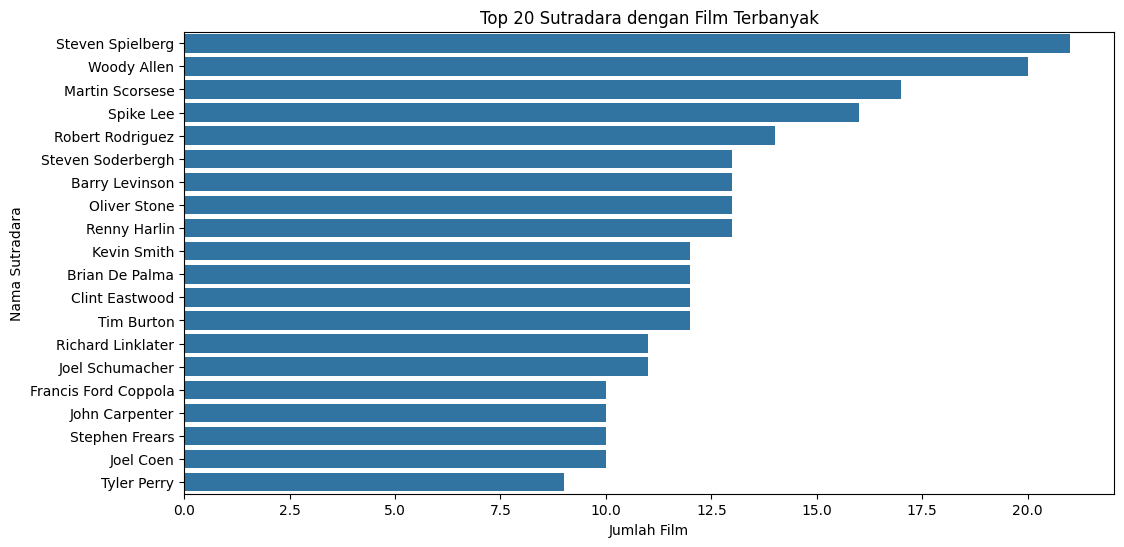

In [23]:
print("Distribusi Film Berdasarkan Peran Sutradara")
def parse_director(crew_str):
    try:
        crew = json.loads(crew_str.replace("'", "\""))  # Menangani kutipan tunggal
        for member in crew:
            if member['job'] == 'Director':
                return member['name']
        return None  # Mengembalikan None jika tidak ada sutradara
    except (json.JSONDecodeError, TypeError):  # Menangani JSON rusak atau None
        return None

df_filtered['director'] = df_filtered['crew'].apply(parse_director)

# Filter hanya sutradara yang valid (non-None)
director_counts = df_filtered[df_filtered['director'].notna()]['director'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=director_counts.values[:20], y=director_counts.index[:20])
plt.title('Top 20 Sutradara dengan Film Terbanyak')
plt.xlabel('Jumlah Film')
plt.ylabel('Nama Sutradara')
plt.show()

**Insight:**

Steven Spielberg memimpin sebagai sutradara dengan jumlah film terbanyak, diikuti oleh Woody Allen dan Martin Scorsese. Hal ini menyoroti kontribusi signifikan mereka dalam penyutradaraan.

### Korelasi Panjang Overview dengan Jumlah Keywords atau Genre

Korelasi Panjang Overview dengan Jumlah Keywords atau Genre


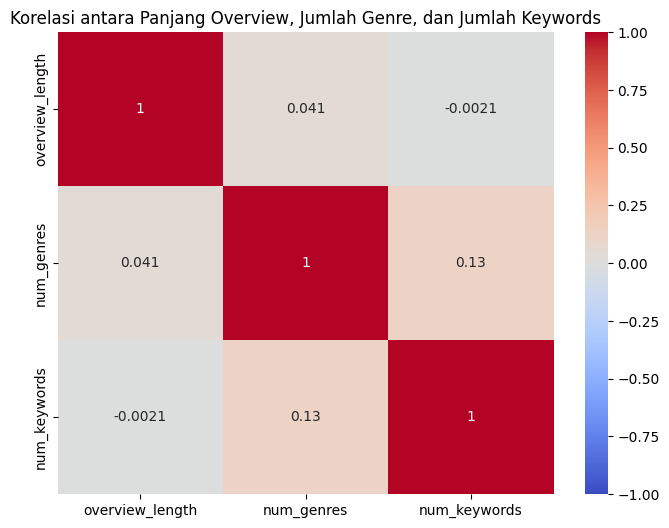

In [24]:
print("Korelasi Panjang Overview dengan Jumlah Keywords atau Genre")
df_filtered['num_genres'] = df_filtered['genres_list'].apply(len)
df_filtered['num_keywords'] = df_filtered['keywords_list'].apply(len)

# Hitung korelasi
correlation_matrix = df_filtered[['overview_length', 'num_genres', 'num_keywords']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelasi antara Panjang Overview, Jumlah Genre, dan Jumlah Keywords')
plt.show()

**Insight:**
- Panjang sinopsis, jumlah genre, dan jumlah kata kunci tidak memiliki korelasi yang kuat satu sama lain (nilai korelasi mendekati 0). Ini berarti panjang sinopsis tidak secara signifikan memprediksi jumlah genre atau kata kunci, dan sebaliknya.

- Ada sedikit korelasi positif antara jumlah genre dan jumlah kata kunci (0.13), menunjukkan bahwa film dengan lebih banyak genre cenderung memiliki sedikit lebih banyak kata kunci.

## Data Quality Verification

### Memeriksa Kesesuaian tipe data dan Menentukan prioritas kolom pada dataset Movies

In [25]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4802
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               4800 non-null   int64 
 1   title            4800 non-null   object
 2   genres           4800 non-null   object
 3   overview         4800 non-null   object
 4   keywords         4800 non-null   object
 5   cast             4800 non-null   object
 6   crew             4800 non-null   object
 7   genres_list      4800 non-null   object
 8   overview_length  4800 non-null   int64 
 9   cast_list        4800 non-null   object
 10  keywords_list    4800 non-null   object
 11  director         4066 non-null   object
 12  num_genres       4800 non-null   int64 
 13  num_keywords     4800 non-null   int64 
dtypes: int64(4), object(10)
memory usage: 562.5+ KB


**Insight:**

Berikut adalah insight dari komponen data dalam bentuk list markdown:

* **Jumlah Baris:** Dataset berisi **4.800 film unik** yang sudah melewati proses penggabungan, pembersihan, dan transformasi kolom penting seperti genre, sinopsis, keyword, dan aktor.
* **Kolom `director`:** Hanya **4.066 entri yang memiliki data sutradara**, artinya terdapat **15.3% missing value**, sehingga kolom ini perlu dipertimbangkan dengan hati-hati saat digunakan sebagai fitur rekomendasi.
* **Kolom `genres_list` & `keywords_list`:** Sudah diubah ke format list Python dari JSON string, sehingga siap digunakan untuk tokenisasi, TF-IDF, atau one-hot encoding. Tidak ditemukan missing value pada kolom ini.
* **Kolom `cast_list`:** Sudah dibatasi ke 5 aktor utama dan diformat sebagai list, mendukung proses pembobotan aktor terkenal dalam sistem rekomendasi.
* **Kolom `overview_length`:** Nilai numerik ini memberikan informasi tentang seberapa informatif sinopsis sebuah film. Tidak ada nilai kosong, dan dapat digunakan sebagai fitur tambahan untuk representasi konten.
* **Kolom `num_genres` & `num_keywords`:** Fitur numerik ini mengukur keragaman genre dan tema dalam setiap film. Nilai ini dapat membantu dalam clustering film atau menambah bobot konten dalam sistem rekomendasi.
* **Konsistensi Data:** Tidak ditemukan duplikasi atau missing value pada kolom utama lainnya seperti `title`, `genres`, `cast`, dan `overview`, yang berarti data siap masuk ke tahap pemodelan setelah representasi fitur selesai.

Kesimpulan

Data dalam kondisi **siap pakai untuk Content-Based Filtering**, dengan mayoritas fitur sudah bersih dan terstruktur. Namun, perhatian khusus diperlukan untuk **kolom `director`** karena ada **>700 entri kosong**, dan dapat diputuskan apakah akan dilakukan imputasi (jika memungkinkan) atau diabaikan pada tahap pembobotan konten.


### Memeriksa Data duplikat

In [26]:
# Drop kolom yang bertipe list (unhashable)
non_list_cols = df_filtered.drop(columns=['genres_list', 'cast_list', 'keywords_list'])

# Cek duplikat
non_list_cols.duplicated().sum()

np.int64(0)

**Insight:**
1. Tidak ada data yang duplikat

### Memeriksa Data Missing Value

In [27]:
df_filtered.isnull().sum()

,0
id,0
title,0
genres,0
overview,0
keywords,0
cast,0
crew,0
genres_list,0
overview_length,0
cast_list,0


**Insight:**
* Semua kolom utama seperti id, title, genres, overview, keywords, cast, dan crew tidak mengandung missing values, menandakan kualitas data yang baik untuk sebagian besar fitur inti sistem rekomendasi.

* Kolom director memiliki 734 nilai kosong, atau sekitar 15.3% dari total data, yang berarti perlu dipertimbangkan untuk:

  - dilakukan imputasi jika memungkinkan (contoh: isi dengan “Unknown” atau dengan crew terdekat),
  - atau diabaikan dalam model content-based jika terlalu sparsity.

* Kolom-kolom hasil transformasi (genres_list, cast_list, keywords_list) telah terisi penuh tanpa missing values, yang penting karena format list ini digunakan untuk representasi konten seperti TF-IDF atau CountVectorizer.

* Kolom overview_length, num_genres, dan num_keywords juga tidak mengandung missing values, siap digunakan sebagai fitur tambahan (numerik) untuk memperkaya informasi konten dalam pemo

### Memeriksa Data Outlier

In [28]:
# Melakukan analisis statistik data setelah dihapus data duplikat dan missing value.
df_filtered.describe()

,id,overview_length,num_genres,num_keywords
count,4800.000000,4800.000000,4800.000000,4800.000000
mean,56967.252917,58.805208,2.532708,7.152708
std,88350.548128,32.057964,1.120651,6.284448
min,5.000000,0.000000,0.000000,0.000000
25%,9012.750000,34.000000,2.000000,3.000000
50%,14623.500000,54.000000,2.000000,6.000000
75%,58512.500000,76.000000,3.000000,10.000000
max,447027.000000,198.000000,7.000000,97.000000


Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, antara lain:

- `Count` adalah jumlah sampel pada data.
- `Mean` adalah nilai rata-rata.
- `Std` adalah standar deviasi.
- `Min` yaitu nilai minimum setiap kolom.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
-` 75%` adalah kuartil ketiga.
- `Max` adalah nilai maksimum.

In [29]:
# Fitur Numerik
numerical_features = [
    'overview_length',   # Panjang sinopsis
    'num_genres',        # Jumlah genre per film
    'num_keywords'       # Jumlah keyword per film
]


# Fitur kategorikal (tipe objek/kategori)
categorical_features = [
    'title',         # Judul film
    'genres_list',   # Daftar genre
    'keywords_list', # Daftar keyword
    'cast_list',     # Daftar aktor
    'director'       # Nama sutradara
]

In [30]:
#Cek data outlier
numerical_feature = [
    'overview_length',   # Panjang sinopsis
    'num_genres',        # Jumlah genre per film
    'num_keywords'       # Jumlah keyword per film
]

# Ensure 'data' is the correct DataFrame variable
selected_cols = df_filtered[numerical_feature] # Changed from df_filtered to data

Q1 = selected_cols.quantile(0.25)
Q3 = selected_cols.quantile(0.75)
IQR = Q3 - Q1

# Correctly filter the DataFrame 'data' and assign to df_cleaned
outlier_condition = ~((selected_cols < (Q1 - 1.5 * IQR)) | (selected_cols > (Q3 + 1.5 * IQR))).any(axis=1)
# Apply the filter to the original 'data' DataFrame
df_cleaned = df_filtered[outlier_condition].copy() # Changed from df_filtered to data and added .copy()

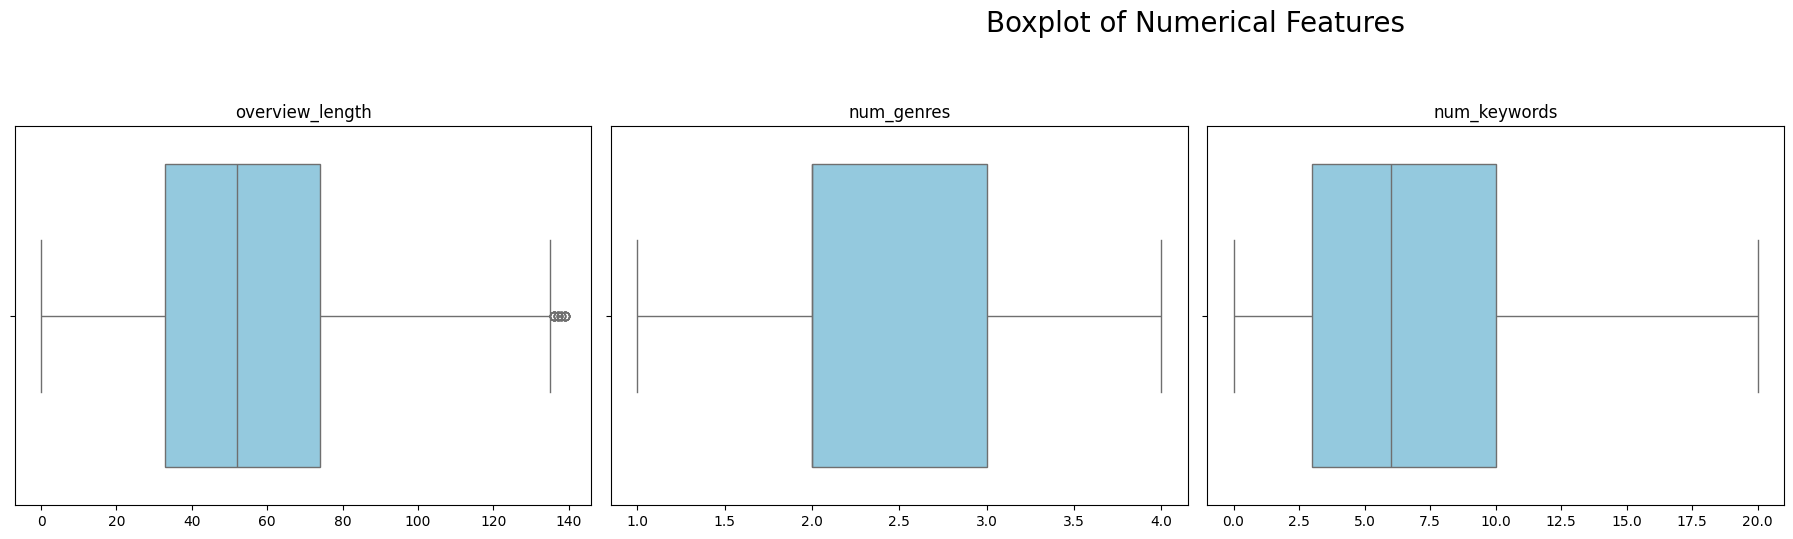

In [31]:
# Buat grid 4 baris x 4 kolom (untuk 17 fitur numerikal)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(24, 18))
fig.suptitle('Boxplot of Numerical Features', fontsize=20)

# Flatten axes supaya bisa diloop
axes = axes.flatten()

# Plot masing-masing fitur
for i, feature in enumerate(numerical_feature):
    sns.boxplot(data=df_cleaned, x=feature, ax=axes[i], color='skyblue')
    axes[i].set_title(f'{feature}', fontsize=12)
    axes[i].set_xlabel('')

# Hapus sisa subplot kosong (jika ada)
for j in range(len(numerical_feature), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Hindari overlap dengan judul
plt.show()


**Interpretasi Boxplot:**

Berdasarkan boxplot dari fitur numerik (`overview_length`, `num_genres`, dan `num_keywords`), berikut adalah interpretasinya:

**1. `overview_length` (Panjang Sinopsis)**
* **Median:** Terletak di sekitar 60-70 kata. Ini menunjukkan bahwa setengah dari film memiliki sinopsis dengan panjang kurang dari 60-70 kata, dan setengahnya lagi lebih dari itu.
* **Jangkauan Interkuartil (IQR):** Kotak boxplot mencakup rentang dari sekitar 40 hingga 80 kata. Ini berarti 50% film memiliki sinopsis dengan panjang dalam rentang ini.
* **Whiskers:** Whiskers membentang cukup jauh, menunjukkan adanya variasi yang signifikan dalam panjang sinopsis.
* **Outlier:** Terdapat beberapa titik di luar whiskers di sisi kanan (sekitar 140-150 kata), yang mengindikasikan adanya film dengan sinopsis yang sangat panjang, jauh di atas sebagian besar sinopsis lainnya.

**2. `num_genres` (Jumlah Genre)**
* **Median:** Terletak di sekitar 2 genre. Ini berarti sebagian besar film memiliki 2 genre.
* **Jangkauan Interkuartil (IQR):** Kotak boxplot mencakup rentang dari 1 hingga 3 genre. Ini menunjukkan bahwa 50% film memiliki antara 1 hingga 3 genre.
* **Whiskers:** Whiskers menunjukkan bahwa sebagian besar film memiliki antara 1 hingga 4 genre.
* **Outlier:** Tidak terlihat adanya outlier yang signifikan pada kolom ini, menunjukkan distribusi jumlah genre yang cukup terkonsentrasi.

**3. `num_keywords` (Jumlah Kata Kunci)**
* **Median:** Terletak di sekitar 7-8 kata kunci. Ini berarti sebagian besar film memiliki 7 atau 8 kata kunci.
* **Jangkauan Interkuartil (IQR):** Kotak boxplot mencakup rentang dari sekitar 5 hingga 10 kata kunci. Ini berarti 50% film memiliki antara 5 hingga 10 kata kunci.
* **Whiskers:** Whiskers membentang, menunjukkan bahwa sebagian besar film memiliki antara 0 hingga sekitar 15 kata kunci.
* **Outlier:** Tidak terlihat adanya outlier yang signifikan, menunjukkan distribusi jumlah kata kunci yang cukup normal.

**Kesimpulan Umum:**
* Fitur `overview_length` menunjukkan variasi yang lebih besar dan adanya outlier dengan sinopsis yang sangat panjang.
* Fitur `num_genres` dan `num_keywords` memiliki distribusi yang lebih terkonsentrasi dan relatif simetris, tanpa outlier yang mencolok, menunjukkan bahwa sebagian besar film memiliki jumlah genre dan kata kunci yang konsisten.

# Data Preparation

### Data Cleaning

#### Melakukan cleaning pada dataset

#### Menghapus kolom yang tidak relevan

In [32]:
# Simpan dulu ID sebelum drop
movie_ids = df_filtered['id']

# Drop kolom ID dari fitur training
df_cleaned = df_filtered.drop(columns=['id'])

#### Melakukan cek kembali dataset

In [33]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4802
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            4800 non-null   object
 1   genres           4800 non-null   object
 2   overview         4800 non-null   object
 3   keywords         4800 non-null   object
 4   cast             4800 non-null   object
 5   crew             4800 non-null   object
 6   genres_list      4800 non-null   object
 7   overview_length  4800 non-null   int64 
 8   cast_list        4800 non-null   object
 9   keywords_list    4800 non-null   object
 10  director         4066 non-null   object
 11  num_genres       4800 non-null   int64 
 12  num_keywords     4800 non-null   int64 
dtypes: int64(3), object(10)
memory usage: 525.0+ KB


In [34]:
movie_ids.head()

,id
0,19995
1,285
2,206647
3,49026
4,49529


id saya simpan di movies_ids untuk berjaga-jaga saja jika nanti di kedepannya saya mau pakai kembali

### Menangani missing values

In [35]:
df_cleaned.isnull().sum()

,0
title,0
genres,0
overview,0
keywords,0
cast,0
crew,0
genres_list,0
overview_length,0
cast_list,0
keywords_list,0


In [36]:
# Isi nilai kosong di kolom 'director' dengan 'Unknown'
df_cleaned['director'] = df_cleaned['director'].fillna('Unknown')

**Insight:**

Mengisi nilai kosong pada kolom director dengan **Unknown** untuk menjaga konsistensi data

### Membuat fitur baru

In [37]:
print(df_cleaned['crew'].iloc[0])

[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"}, 

In [38]:
print(df_cleaned['cast'].iloc[0])

[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 2

#### Pembuatan FItur Baru num_cast dan num_crew

In [39]:
def count_cast(cast_entry):
    # Jika tipe data string (seperti hasil dari CSV), ubah dulu ke list of dict
    if isinstance(cast_entry, str):
        try:
            cast_entry = ast.literal_eval(cast_entry)
        except:
            return 0
    # Hitung panjang list jika valid
    if isinstance(cast_entry, list):
        return len(cast_entry)
    return 0

df_cleaned['num_cast'] = df_cleaned['cast'].apply(count_cast)

In [40]:
def count_crew(crew_entry):
    # Jika tipe data masih string, ubah jadi list of dict
    if isinstance(crew_entry, str):
        try:
            crew_entry = ast.literal_eval(crew_entry)
        except:
            return 0
    # Hitung banyaknya kru
    if isinstance(crew_entry, list):
        return len(crew_entry)
    return 0

df_cleaned['num_crew'] = df_cleaned['crew'].apply(count_crew)

In [41]:
df_cleaned.head()

,title,genres,overview,keywords,cast,crew,genres_list,overview_length,cast_list,keywords_list,director,num_genres,num_keywords,num_cast,num_crew
0,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","In the 22nd century, a paraplegic Marine is di...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[Action, Adventure, Fantasy, Science Fiction]",31,[],"[culture clash, future, space war, space colon...",Unknown,4,21,83,153
1,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","Captain Barbossa, long believed to be dead, ha...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[Adventure, Fantasy, Action]",38,[],[],Gore Verbinski,3,0,34,32
2,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",A cryptic message from Bond’s past sends him o...,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[Action, Adventure, Crime]",46,[],"[spy, based on novel, secret agent, sequel, mi...",Unknown,3,7,83,155
3,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Following the death of District Attorney Harve...,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[Action, Crime, Drama, Thriller]",74,[],"[dc comics, crime fighter, terrorist, secret i...",Unknown,4,21,158,217
4,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","John Carter is a war-weary, former military ca...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[Action, Adventure, Science Fiction]",63,"[Taylor Kitsch, Lynn Collins, Samantha Morton]","[based on novel, mars, medallion, space travel...",Andrew Stanton,3,16,27,132


### Preprocessing Teks (untuk kolom 'overview' dan 'keywords_list')

In [42]:
stop_words = set(stopwords.words('english'))

stemmer = PorterStemmer()

def preprocess_text(text):
    if not isinstance(text, str):
        return ''
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = [stemmer.stem(word) for word in nltk.word_tokenize(text) if word not in stop_words]
    return ' '.join(tokens)

def preprocess_keywords_list(keywords, remove_stopwords=True):
    if not isinstance(keywords, list):
        return []
    processed = []
    for word in keywords:
        word = word.lower().translate(str.maketrans('', '', string.punctuation))
        if word and (not remove_stopwords or word not in stop_words):
            processed.append(word)
    return processed

# Terapkan
df_cleaned['overview'] = df_cleaned['overview'].apply(preprocess_text)
# Terapkan tanpa menghapus stop words pada keywords_list
df_cleaned['keywords_list'] = df_cleaned['keywords_list'].apply(lambda x: preprocess_keywords_list(x, remove_stopwords=False))

### Cek Outlier FItur Numerik

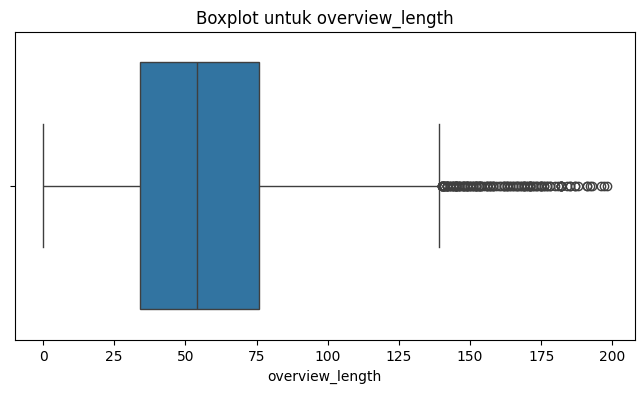

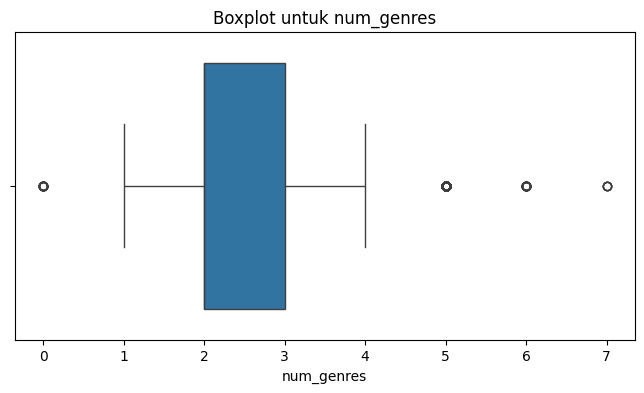

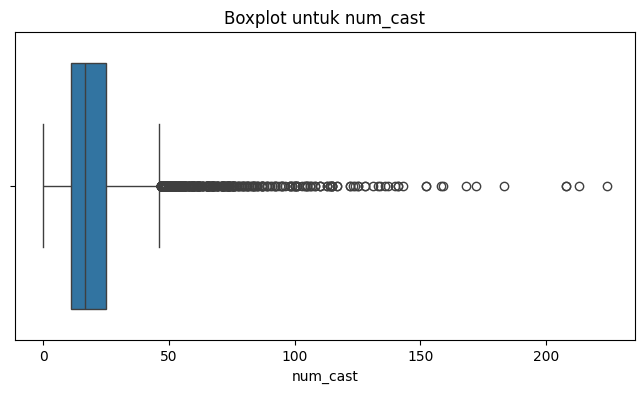

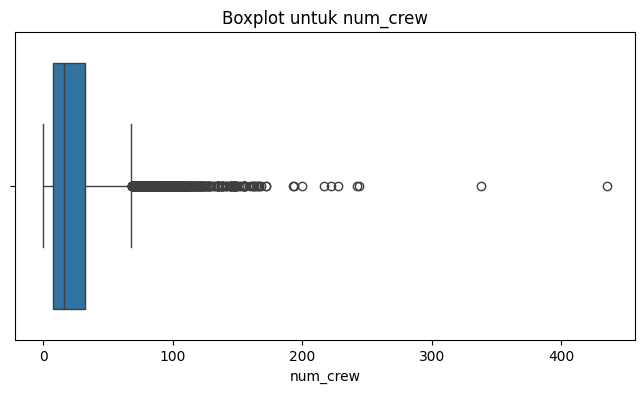

In [43]:
numerical_features = ['overview_length', 'num_genres', 'num_cast', 'num_crew']

for col in numerical_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Boxplot untuk {col}')
    plt.show()

**Insight: Mengapa Saya Mempertahankan Outlier dalam Dataset Film Ini**

Sebagai seorang analis data, ketika saya melihat outlier di fitur-fitur seperti panjang sinopsis, jumlah genre, jumlah pemeran, dan jumlah kru, keputusan pertama saya bukanlah langsung menghapusnya. Sebaliknya, saya melihatnya sebagai **informasi berharga yang mencerminkan keragaman dan kekayaan industri film.**

Berikut adalah alasan spesifik mengapa saya memilih untuk tidak menghapus outlier ini:

1.  **`overview_length` (Panjang Sinopsis):**
    * **"Sinopsis Panjang Itu Valid."** Saya melihat sinopsis yang sangat panjang sebagai bagian dari spektrum film. Beberapa film memang membutuhkan penjelasan yang lebih detail atau memiliki narasi yang kompleks yang tidak bisa disimpulkan dalam beberapa kalimat. Menghapus film-film ini hanya karena sinopsisnya "ekstra" berarti saya akan kehilangan film-film unik dari dataset saya. Sebagai gantinya, saya akan mempertimbangkan teknik pemrosesan teks yang bisa menangani panjang dokumen yang bervariasi, bukan memangkas data asli.

2.  **`num_genres` (Jumlah Genre):**
    * **"Film Multigenre Itu Nyata."** Ketika saya melihat film dengan 0 genre atau bahkan 5, 6, atau 7 genre, saya tahu ini bukan kesalahan data. Film tanpa genre mungkin saja karena belum diklasifikasikan dengan baik atau memang eksperimental. Di sisi lain, film-film seperti "Action-Comedy-Fantasy-Adventure" itu lumrah dan penting untuk mengenali kekayaan kontennya. Menghapus outlier ini akan membuat dataset saya kurang representatif terhadap dunia perfilman yang sebenarnya. Informasi ini justru memperkaya pemahaman saya tentang keragaman genre film.

3.  **`num_cast` (Jumlah Pemeran):**
    * **"Skala Produksi Bervariasi."** Jumlah pemeran yang sangat tinggi menunjukkan adanya film-film dengan skala produksi besar, mungkin epik sejarah, film perang, atau film dengan banyak karakter pendukung. Ini adalah karakteristik penting sebuah film. Jika saya menghapus outlier ini, saya akan menghilangkan sebagian besar film yang "besar" dan hanya tersisa dengan film-film berskala kecil atau menengah, padahal kedua jenis film itu sama-sama relevan.

4.  **`num_crew` (Jumlah Kru):**
    * **"Tim Produksi yang Besar Adalah Normal untuk Film Tertentu."** Mirip dengan jumlah pemeran, jumlah kru yang sangat banyak mengindikasikan proyek film yang kompleks dan berskala besar. Ini bisa berarti efek visual yang masif, banyak lokasi syuting, atau tuntutan teknis yang tinggi. Menghapus outlier ini berarti mengabaikan segmen penting dari produksi film dan potensi insight tentang biaya atau kompleksitas yang terlibat.

**Kesimpulan Pendekatan Saya:**

Pada dasarnya, saya meyakini bahwa **outlier ini adalah data yang sah dan membawa informasi penting** tentang variasi dan karakteristik film-film dalam dataset. Menghapusnya hanya akan menyederhanakan data secara artifisial, mengurangi kompleksitas yang justru saya ingin pahami dan manfaatkan. Alih-alih menghapus, saya akan memilih untuk menerapkan teknik pemrosesan data yang lebih canggih (seperti transformasi logaritmik atau penskalaan) untuk memastikan bahwa model saya dapat belajar secara efektif dari seluruh spektrum data yang ada, termasuk outlier yang kaya informasi ini.

## Encoding Kategorikal

In [44]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4802
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            4800 non-null   object
 1   genres           4800 non-null   object
 2   overview         4800 non-null   object
 3   keywords         4800 non-null   object
 4   cast             4800 non-null   object
 5   crew             4800 non-null   object
 6   genres_list      4800 non-null   object
 7   overview_length  4800 non-null   int64 
 8   cast_list        4800 non-null   object
 9   keywords_list    4800 non-null   object
 10  director         4800 non-null   object
 11  num_genres       4800 non-null   int64 
 12  num_keywords     4800 non-null   int64 
 13  num_cast         4800 non-null   int64 
 14  num_crew         4800 non-null   int64 
dtypes: int64(5), object(10)
memory usage: 600.0+ KB


### Cek Kolom Director Sebelum Dilakukan Encoding

In [45]:
# Hitung jumlah unique director dan tampilkan top 10 director terbanyak
num_unique_directors = df_cleaned['director'].nunique()
top_directors = df_cleaned['director'].value_counts().head(10)

print(f"Jumlah director unik: {num_unique_directors}")
print("Top 10 director terbanyak:")
print(top_directors)

Jumlah director unik: 2185
Top 10 director terbanyak:
director
Unknown              734
Steven Spielberg      21
Woody Allen           20
Martin Scorsese       17
Spike Lee             16
Robert Rodriguez      14
Renny Harlin          13
Oliver Stone          13
Barry Levinson        13
Steven Soderbergh     13
Name: count, dtype: int64


### Cek Kolom genre_list Sebelum Dilakukan Encoding

In [46]:
# Cek tipe data pada elemen genres_list pertama (contoh)
print(f"Tipe data elemen pertama genres_list: {type(df_cleaned['genres_list'].iloc[0])}")

# Jika bertipe string, konversi ke list dengan split '|'
if isinstance(df_cleaned['genres_list'].iloc[0], str):
    df_cleaned['genres_list'] = df_cleaned['genres_list'].apply(lambda x: x.split('|') if isinstance(x, str) else x)
    print("Kolom genres_list berhasil dikonversi dari string ke list.")
else:
    print("Kolom genres_list sudah berbentuk list.")

Tipe data elemen pertama genres_list: <class 'list'>
Kolom genres_list sudah berbentuk list.


### Cek Kolom keywords_list Sebelum Dilakukan Encoding

In [47]:
# Cek tipe data elemen pertama pada kolom keywords_list
print(type(df_cleaned['keywords_list'].iloc[0]))

# Cek beberapa elemen sekaligus
print([type(x) for x in df_cleaned['keywords_list'].head(5)])

<class 'list'>
[<class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>]


In [48]:
# Gabungkan list jadi string: ['space', 'alien'] → "space alien"
df_cleaned['keywords_str'] = df_cleaned['keywords_list'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')

In [49]:
print(df_cleaned['keywords_str'].head())

0    culture clash future space war space colony so...
1                                                     
2    spy based on novel secret agent sequel mi6 bri...
3    dc comics crime fighter terrorist secret ident...
4    based on novel mars medallion space travel pri...
Name: keywords_str, dtype: object


### Cek Kolom cast_list Sebelum Dilakukan Encoding

In [50]:
# Cek tipe data elemen pertama pada kolom keywords_list
print(type(df_cleaned['cast_list'].iloc[0]))

# Cek beberapa elemen sekaligus
print([type(x) for x in df_cleaned['cast_list'].head(5)])

<class 'list'>
[<class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>]


In [51]:
df_cleaned['cast_str'] = df_cleaned['cast_list'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

### Encoding genres_list dengan MultiLabelBinarizer

In [52]:
mlb = MultiLabelBinarizer()

# Fit dan transform genres_list
genres_encoded = mlb.fit_transform(df_cleaned['genres_list'])

# Buat DataFrame hasil encoding dengan nama kolom genre
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_, index=df_cleaned.index)

print(f"Shape genres encoded: {genres_df.shape}")

Shape genres encoded: (4800, 20)


### Encoding untuk keywords_list dengan TF-IDF

In [53]:
tfidf_keywords = TfidfVectorizer(
    max_features=5000,  # Batasi ke 5000 fitur teratas untuk fokus pada kata-kata penting
    stop_words='english',  # Hapus stop words untuk mengurangi noise
    ngram_range=(1, 2)  # Gunakan unigram dan bigram untuk menangkap frasa
)
keywords_tfidf = tfidf_keywords.fit_transform(df_cleaned['keywords_str'])

# Ubah menjadi DataFrame
df_keywords_tfidf = pd.DataFrame(
    keywords_tfidf.toarray(),
    columns=tfidf_keywords.get_feature_names_out(),
    index=df_cleaned.index
)
print(f"Shape of keywords TF-IDF: {df_keywords_tfidf.shape}")

Shape of keywords TF-IDF: (4800, 5000)


### Encoding untuk cast_list dengan CountVectorizer

In [54]:
count_vect_cast = CountVectorizer(max_features=100)  # max_features bisa disesuaikan
cast_encoded = count_vect_cast.fit_transform(df_cleaned['cast_str'])

df_cast_encoded = pd.DataFrame(cast_encoded.toarray(), columns=count_vect_cast.get_feature_names_out(), index=df_cleaned.index)
print(f"Shape genres encoded: {df_keywords_tfidf.shape}")

Shape genres encoded: (4800, 5000)


### Encofing untuk Director dengaan LabelEncoding

In [55]:
le = LabelEncoder()
df_cleaned['director_encoded'] = le.fit_transform(df_cleaned['director'])

print("Label encoding director selesai. Contoh mapping:")
for label, name in zip(le.transform(le.classes_), le.classes_[:5]):  # Menampilkan 5 contoh mapping
    print(f"{label} -> {name}")

print("\nContoh data director_encoded:")
print(df_cleaned[['director', 'director_encoded']].head(5))  # Cetak hanya 5 baris pertama

Label encoding director selesai. Contoh mapping:
0 -> Aaron Hann
1 -> Aaron Schneider
2 -> Abel Ferrara
3 -> Adam Brooks
4 -> Adam Carolla

Contoh data director_encoded:
         director  director_encoded
0         Unknown              2097
1  Gore Verbinski               713
2         Unknown              2097
3         Unknown              2097
4  Andrew Stanton                89


In [56]:
print(len(le.classes_))

2185


### Encoding overviewe dengan TF-IDF

In [57]:
tfidf_overview = TfidfVectorizer(
    max_features=5000,  # Batasi ke 5000 fitur teratas
    stop_words='english',  # Hapus stop words
    ngram_range=(1, 2)  # Gunakan unigram dan bigram
)
overview_tfidf = tfidf_overview.fit_transform(df_cleaned['overview'])

# Ubah menjadi DataFrame
df_overview_tfidf = pd.DataFrame(
    overview_tfidf.toarray(),
    columns=tfidf_overview.get_feature_names_out(),
    index=df_cleaned.index
)
print(f"Shape of overview TF-IDF: {df_overview_tfidf.shape}")

Shape of overview TF-IDF: (4800, 5000)


### Penggabungan Semua Fitur yang Sudah Di Encoding

In [58]:
# 1. Ambil fitur numerik + director_encoded dari df_cleaned
df_numerik = df_cleaned[['overview_length', 'num_genres', 'num_keywords', 'num_cast', 'num_crew', 'director_encoded']]

# 2. Gabungkan semua encoding
df_final_features = pd.concat([
    df_numerik,
    genres_df,
    df_keywords_tfidf,
    df_cast_encoded,
    df_overview_tfidf
], axis=1)

# 3. Cek bentuk akhir
print(f"Bentuk akhir df_final_features: {df_final_features.shape}")
print(df_final_features.head())

Bentuk akhir df_final_features: (4800, 10126)
   overview_length  num_genres  num_keywords  num_cast  num_crew  \
0               31           4            21        83       153   
1               38           3             0        34        32   
2               46           3             7        83       155   
3               74           4            21       158       217   
4               63           3            16        27       132   

   director_encoded  Action  Adventure  Animation  Comedy  ...  youngest  \
0              2097       1          1          0       0  ...       0.0   
1               713       1          1          0       0  ...       0.0   
2              2097       1          1          0       0  ...       0.0   
3              2097       1          0          0       0  ...       0.0   
4                89       1          1          0       0  ...       0.0   

   youngster  youth  zealand  zeu  zion  zoe  zombi  zone  zoo  
0        0.0    0.0    

## Standarisasi

Proses scaling dan normalisasi membantu untuk membuat fitur data menjadi bentuk yang lebih mudah diolah oleh algoritma dan menyeragamkan karena memiliki satuan yang berbeda pada tiap fitur.


In [59]:
scaler = StandardScaler()

# Standarisasi, hasilnya berupa numpy array
X_scaled = scaler.fit_transform(df_final_features)

# Buat DataFrame kembali dengan kolom sama dan index sama
df_final_scaled = pd.DataFrame(X_scaled, columns=df_final_features.columns, index=df_final_features.index)

print(df_final_scaled.head())

   overview_length  num_genres  num_keywords  num_cast  num_crew  \
0        -0.867432    1.309457      2.203652  3.108413  3.983832   
1        -0.649055    0.417026     -1.138279  0.605978  0.158259   
2        -0.399481    0.417026     -0.024302  3.108413  4.047064   
3         0.474028    1.309457      2.203652  6.938669  6.007275   
4         0.130864    0.417026      1.407954  0.248488  3.319889   

   director_encoded    Action  Adventure  Animation    Comedy  ...  youngest  \
0          1.207804  1.777483   2.252987  -0.226381 -0.747967  ... -0.047748   
1         -0.818506  1.777483   2.252987  -0.226381 -0.747967  ... -0.047748   
2          1.207804  1.777483   2.252987  -0.226381 -0.747967  ... -0.047748   
3          1.207804  1.777483  -0.443855  -0.226381 -0.747967  ... -0.047748   
4         -1.732103  1.777483   2.252987  -0.226381 -0.747967  ... -0.047748   

   youngster     youth   zealand       zeu      zion       zoe     zombi  \
0  -0.038042 -0.079426 -0.034538 -

In [60]:
df_final_scaled.head()

,overview_length,num_genres,num_keywords,num_cast,num_crew,director_encoded,Action,Adventure,Animation,Comedy,...,youngest,youngster,youth,zealand,zeu,zion,zoe,zombi,zone,zoo
0,-0.867432,1.309457,2.203652,3.108413,3.983832,1.207804,1.777483,2.252987,-0.226381,-0.747967,...,-0.047748,-0.038042,-0.079426,-0.034538,-0.036583,-0.028814,-0.035896,-0.070399,-0.042107,-0.030992
1,-0.649055,0.417026,-1.138279,0.605978,0.158259,-0.818506,1.777483,2.252987,-0.226381,-0.747967,...,-0.047748,-0.038042,-0.079426,-0.034538,-0.036583,-0.028814,-0.035896,-0.070399,-0.042107,-0.030992
2,-0.399481,0.417026,-0.024302,3.108413,4.047064,1.207804,1.777483,2.252987,-0.226381,-0.747967,...,-0.047748,-0.038042,-0.079426,-0.034538,-0.036583,-0.028814,-0.035896,-0.070399,-0.042107,-0.030992
3,0.474028,1.309457,2.203652,6.938669,6.007275,1.207804,1.777483,-0.443855,-0.226381,-0.747967,...,-0.047748,-0.038042,-0.079426,-0.034538,-0.036583,-0.028814,-0.035896,-0.070399,-0.042107,-0.030992
4,0.130864,0.417026,1.407954,0.248488,3.319889,-1.732103,1.777483,2.252987,-0.226381,-0.747967,...,-0.047748,-0.038042,-0.079426,-0.034538,-0.036583,-0.028814,-0.035896,-0.070399,-0.042107,-0.030992


# Modeling and Result

## Cosine Similarity

In [61]:

# Hitung matriks cosine similarity dari data fitur yang sudah distandarisasi
cos_sim_matrix = cosine_similarity(df_final_scaled)

# Set index dataframe ke kolom 'title' agar indeksnya berupa judul film
df_cleaned = df_cleaned.set_index('title')

cos_sim_matrix

array([[ 1.00000000e+00, -6.94913908e-04, -8.37779317e-04, ...,
         5.16173505e-03, -5.83656963e-03, -4.78728818e-03],
       [-6.94913908e-04,  1.00000000e+00, -2.40912849e-03, ...,
         1.44563826e-03, -2.95350150e-03, -3.13028175e-03],
       [-8.37779317e-04, -2.40912849e-03,  1.00000000e+00, ...,
        -3.50630937e-03, -6.83683780e-03, -5.93557746e-03],
       ...,
       [ 5.16173505e-03,  1.44563826e-03, -3.50630937e-03, ...,
         1.00000000e+00, -3.68935686e-03, -4.40306905e-03],
       [-5.83656963e-03, -2.95350150e-03, -6.83683780e-03, ...,
        -3.68935686e-03,  1.00000000e+00, -1.71493856e-03],
       [-4.78728818e-03, -3.13028175e-03, -5.93557746e-03, ...,
        -4.40306905e-03, -1.71493856e-03,  1.00000000e+00]])

In [62]:
# Ubah hasil matriks cosine similarity menjadi DataFrame agar lebih mudah diakses
# Index dan kolom menggunakan index asli dari df_cleaned untuk memudahkan pencocokan data
cosine_sim_df = pd.DataFrame(
    cos_sim_matrix,
    index=df_cleaned.index,
    columns=df_cleaned.index
)

# Tampilkan ukuran matriks cosine similarity (seharusnya n x n)
print(f"Shape cosine similarity matrix: {cosine_sim_df.shape}")

# Tampilkan 5 baris pertama dari matriks cosine similarity untuk melihat nilai similarity antar data
print(cosine_sim_df.head())

Shape cosine similarity matrix: (4800, 4800)
title                                       Avatar  \
title                                                
Avatar                                    1.000000   
Pirates of the Caribbean: At World's End -0.000695   
Spectre                                  -0.000838   
The Dark Knight Rises                     0.004765   
John Carter                               0.025043   

title                                     Pirates of the Caribbean: At World's End  \
title                                                                                
Avatar                                                                   -0.000695   
Pirates of the Caribbean: At World's End                                  1.000000   
Spectre                                                                  -0.002409   
The Dark Knight Rises                                                    -0.004244   
John Carter                                                 

In [63]:
# Lihat cuplikan similarity matrix (acak 5 kolom dan 15 baris)
cosine_sim_df.sample(15, axis=0).sample(5, axis=1)

title,Our Idiot Brother,Regression,A Knight's Tale,Death Becomes Her,The Blue Bird
title,,,,,
Going the Distance,-0.002358,-0.005497,0.004718,-0.004874,-0.005766
Goosebumps,-0.002185,-0.002000,-0.002283,-0.003187,-0.001104
Barbershop,-0.002084,-0.002114,-0.001699,-0.002718,-0.003689
Paranormal Activity 3,0.050536,-0.000835,-0.002106,-0.002673,-0.002664
Becoming Jane,0.002923,-0.001637,-0.000537,-0.002447,-0.003532
Book of Shadows: Blair Witch 2,-0.004637,0.001385,-0.002678,-0.003748,-0.005600
Yeh Jawaani Hai Deewani,-0.003225,-0.001447,-0.000954,-0.002880,0.000308
Tadpole,0.010202,-0.004780,0.003358,-0.004887,0.021556
Coriolanus,-0.002134,-0.002828,-0.002640,0.050224,-0.003165


## Inference

In [64]:
def recommend_by_identifier(movie_title, top_n=10):
    try:
        # Ambil similarity series untuk judul film yang diminta
        similarity_series = cosine_sim_df.loc[movie_title]

        # Hapus film itu sendiri dari hasil similarity
        similarity_series = similarity_series.drop(movie_title, errors='ignore')

        # Urutkan dari similarity tertinggi ke terendah
        similarity_series = similarity_series.sort_values(ascending=False)

        # Ambil top N film paling mirip dan reset index untuk menghilangkan nama kolom tambahan
        top_similar = similarity_series.head(top_n).reset_index()
        top_similar.columns = ['title', 'similarity_score']  # Ubah nama kolom menjadi lebih jelas

        return top_similar
    except KeyError:
        return f"Error: Judul film '{movie_title}' tidak ditemukan dalam data."

In [65]:
recommend_by_identifier("Spectre", top_n=10)

,title,similarity_score
0,Restless,0.369453
1,Quantum of Solace,0.256897
2,Nick and Norah's Infinite Playlist,0.242552
3,The World Is Not Enough,0.167167
4,Die Another Day,0.158298
5,Thunderball,0.150013
6,Skyfall,0.143905
7,Casino Royale,0.120900
8,Something Borrowed,0.120184
9,Never Say Never Again,0.120023


In [66]:
recommend_by_identifier("Young Sherlock Holmes", top_n=5)

,title,similarity_score
0,Dreamcatcher,0.235698
1,Sherlock Holmes,0.202782
2,London Has Fallen,0.193094
3,Sherlock Holmes: A Game of Shadows,0.133134
4,The Party's Over,0.132645


# Evaluation

## Penjelasan Metrik yang digunakan

### **Evaluasi Sistem Rekomendasi**
Metrik yang digunakan untuk mengevaluasi seberapa baik model **Content-based Filtering** dalam memberikan rekomendasi adalah **Precision@k**, **Recall@k**, dan **F1-Score@k**. Metrik-metrik ini merupakan bagian dari evaluasi berbasis relevansi, yang biasa digunakan dalam sistem rekomendasi dan *information retrieval*, untuk mengukur ketepatan, kelengkapan, dan keseimbangan rekomendasi.

#### **1. Precision@k**
- **Definisi**: Precision@k digunakan untuk mengukur proporsi item yang relevan dari total item yang direkomendasikan sebanyak *k*. Metrik ini menunjukkan seberapa **tepat** sistem dalam memberikan rekomendasi.
- **Formula**:
  $$
  \text{Precision@k} = \frac{\text{Jumlah item relevan dalam rekomendasi}}{k}
  $$
- **Interpretasi**: Nilai mendekati 1 menunjukkan bahwa sebagian besar rekomendasi relevan, sedangkan nilai mendekati 0 menunjukkan banyak rekomendasi yang tidak relevan.

#### **2. Recall@k**
- **Definisi**: Recall@k digunakan untuk mengukur proporsi item relevan yang berhasil ditemukan oleh sistem dari seluruh item relevan yang tersedia. Metrik ini menunjukkan seberapa **lengkap** sistem dalam menangkap item relevan.
- **Formula**:
  $$
  \text{Recall@k} = \frac{\text{Jumlah item relevan dalam rekomendasi}}{\text{Jumlah total item relevan}}
  $$
- **Interpretasi**: Nilai mendekati 1 menunjukkan bahwa sistem berhasil menangkap hampir semua item relevan, sedangkan nilai mendekati 0 menunjukkan banyak item relevan yang terlewat.

#### **3. F1-Score@k**
- **Definisi**: F1-Score@k merupakan rata-rata harmonik dari Precision dan Recall. Metrik ini digunakan untuk memberikan keseimbangan antara ketepatan dan kelengkapan rekomendasi.
- **Formula**:
  $$
  \text{F1-Score@k} = \frac{2 \times \text{Precision@k} \times \text{Recall@k}}{\text{Precision@k} + \text{Recall@k}}
  $$
- **Interpretasi**: Nilai mendekati 1 menunjukkan keseimbangan yang baik antara ketepatan dan kelengkapan, sedangkan nilai mendekati 0 menunjukkan performa yang buruk.

## Contoh Penerapan

#### Ground Truth

In [67]:
# Membuat ground truth
ground_truth = {
    "Spectre": {
        "Skyfall",
        "Casino Royale",
        "Quantum of Solace",
        "GoldenEye",
        "Die Another Day"
    },
    "The Dark Knight": {
        "The Dark Knight Rises",
        "Batman Begins",
        "Batman v Superman: Dawn of Justice",
        "Man of Steel",
        "Justice League"
    },
    "Avatar": {
        "Titanic",
        "Terminator 2: Judgment Day",
        "Aliens",
        "The Abyss",
        "True Lies"
    }
}

**Penjelasan Ground Truth:**

Untuk "Spectre", saya memilih film James Bond lainnya yang relevan (berdasarkan tema spy/action dan karakter utama).
Untuk "The Dark Knight", saya memilih film Batman atau superhero lainnya yang terkait.
Untuk "Avatar", saya memilih film lain karya James Cameron dengan tema sci-fi atau action.
Anda dapat memperluas ground truth ini dengan lebih banyak film atau menggunakan data eksternal (misalnya, berdasarkan genre atau rating pengguna).

#### Mempersiapkan fungsi rekomendasi

In [68]:
# TF-IDF untuk keywords_str
tfidf_keywords = TfidfVectorizer(
    max_features=5000,
    stop_words='english',
    ngram_range=(1, 2)
)
keywords_tfidf = tfidf_keywords.fit_transform(df_cleaned['keywords_str'])
df_keywords_tfidf = pd.DataFrame(
    keywords_tfidf.toarray(),
    columns=tfidf_keywords.get_feature_names_out(),
    index=df_cleaned.index
)

# TF-IDF untuk overview
tfidf_overview = TfidfVectorizer(
    max_features=5000,
    stop_words='english',
    ngram_range=(1, 2)
)
overview_tfidf = tfidf_overview.fit_transform(df_cleaned['overview'])
df_overview_tfidf = pd.DataFrame(
    overview_tfidf.toarray(),
    columns=tfidf_overview.get_feature_names_out(),
    index=df_cleaned.index
)

# Gabungkan kedua DataFrame TF-IDF
tfidf_combined = pd.concat([df_keywords_tfidf, df_overview_tfidf], axis=1, join='inner')

# Hitung cosine similarity
cos_sim_matrix = cosine_similarity(tfidf_combined)
cosine_sim_df = pd.DataFrame(cos_sim_matrix, index=df_cleaned.index, columns=df_cleaned.index)

# Fungsi rekomendasi
def recommend_by_identifier(movie_title, top_n=10):
    try:
        similarity_series = cosine_sim_df.loc[movie_title]
        similarity_series = similarity_series.drop(movie_title, errors='ignore')
        similarity_series = similarity_series.sort_values(ascending=False)
        top_similar = similarity_series.head(top_n).index.tolist()
        return pd.Series(top_similar, index=range(top_n))
    except KeyError:
        return pd.Series([], index=range(top_n))

#### Implementasi Fungsi Evaluasi

In [69]:
def evaluate_single_recommendation(movie_title, recommend_func, ground_truth, k=5):
    # Dapatkan rekomendasi
    recommended = recommend_func(movie_title, top_n=k)
    recommended_movies = set(recommended)

    # Dapatkan item relevan dari ground truth
    relevant_movies = ground_truth.get(movie_title, set())

    # Hitung true positives (film relevan yang ditemukan)
    true_positives = recommended_movies & relevant_movies

    # Hitung Precision@k
    precision = len(true_positives) / k if k > 0 else 0

    # Hitung Recall@k
    recall = len(true_positives) / len(relevant_movies) if relevant_movies else 0

    # Hitung F1-Score@k
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    # Kembalikan hasil evaluasi
    return {
        f'Precision@{k}': round(precision, 4),
        f'Recall@{k}': round(recall, 4),
        f'F1-Score@{k}': round(f1, 4),
        'Relevant Found': list(true_positives)
    }

#### Jalankan Evaluasi

In [70]:
# Evaluasi untuk "Spectre" dengan k=5
result = evaluate_single_recommendation(
    movie_title="Spectre",
    recommend_func=recommend_by_identifier,
    ground_truth=ground_truth,
    k=5
)

# Tampilkan hasil
print("Hasil Evaluasi untuk 'Spectre':")
print(result)

Hasil Evaluasi untuk 'Spectre':
{'Precision@5': 0.6, 'Recall@5': 0.6, 'F1-Score@5': 0.6, 'Relevant Found': ['Die Another Day', 'Skyfall', 'Quantum of Solace']}


**1. Insight Individual – Film "Spectre"**

* **Precision: 0.6**, **Recall: 0.6**, **F1-Score: 0.6**
* **Relevant Found**: `['Die Another Day', 'Skyfall', 'Quantum of Solace']`

**Penjelasan:**

* Dari 5 rekomendasi yang diberikan, 3 di antaranya relevan (film sejenis atau terkait dalam satu franchise, yaitu James Bond).
* Ini menunjukkan bahwa sistem berhasil mengidentifikasi film-film yang benar-benar mirip berdasarkan fitur konten.
* **Precision dan Recall seimbang (0.6)** mengindikasikan bahwa sistem tidak hanya memberikan rekomendasi yang akurat tetapi juga cukup lengkap dalam meng-cover film relevan.

**Insight:**

> Model bekerja **cukup baik untuk film dengan franchise atau tema yang konsisten**, seperti *Spectre* yang merupakan bagian dari seri James Bond. Model berhasil mengenali hubungan antar film berdasarkan fitur yang diolah.


#### Evaluasi untuk Beberapa Film (Opsional)

In [71]:
# Evaluasi untuk beberapa film
movies_to_evaluate = ["Spectre", "The Dark Knight", "Avatar"]
results = {}

for movie in movies_to_evaluate:
    result = evaluate_single_recommendation(
        movie_title=movie,
        recommend_func=recommend_by_identifier,
        ground_truth=ground_truth,
        k=5
    )
    results[movie] = result

# Ubah hasil ke DataFrame untuk tampilan yang lebih rapi
results_df = pd.DataFrame(results).T
print("\nHasil Evaluasi untuk Beberapa Film (k=5):")
print(results_df)


Hasil Evaluasi untuk Beberapa Film (k=5):
                Precision@5 Recall@5 F1-Score@5  \
Spectre                 0.6      0.6        0.6   
The Dark Knight         0.4      0.4        0.4   
Avatar                  0.2      0.2        0.2   

                                                Relevant Found  
Spectre          [Die Another Day, Skyfall, Quantum of Solace]  
The Dark Knight         [The Dark Knight Rises, Batman Begins]  
Avatar                                                [Aliens]  


**2. Insight Kolektif – Evaluasi Beberapa Film**

| Judul               | Precision5 | Recall | F1-Score | Relevant Found                                       |
| ------------------- | ------------ | --------- | ----------- | ---------------------------------------------------- |
| **Spectre**         | 0.6          | 0.6       | 0.6         | \['Die Another Day', 'Skyfall', 'Quantum of Solace'] |
| **The Dark Knight** | 0.4          | 0.4       | 0.4         | \['The Dark Knight Rises', 'Batman Begins']          |
| **Avatar**          | 0.2          | 0.2       | 0.2         | \['Aliens']                                          |

**Penjelasan:**

* Film dengan **franchise kuat atau trilogi** (misalnya *Batman* dan *James Bond*) mendapat skor evaluasi lebih tinggi.
* **Avatar** memiliki skor paling rendah (0.2), menunjukkan bahwa model kesulitan menemukan film yang benar-benar sejenis, kemungkinan karena:

  * Karakteristik film yang unik
  * Kurangnya fitur yang secara eksplisit menghubungkan film dengan karya serupa (*Aliens* bisa relevan dari sisi genre/sutradara)

**Insight Umum:**

> Model memiliki **kinerja terbaik pada film dengan hubungan yang eksplisit** (genre, sutradara, karakter, atau waralaba). Namun, **kurang optimal untuk film yang berdiri sendiri atau memiliki genre campuran**, seperti *Avatar*, karena keterbatasan fitur konten dalam merepresentasikan kedalaman cerita atau nuansa visual secara penuh.

# Menjawab Problems

### 1. Mengidentifikasi TOP 10 cast (aktor/aktris)

In [74]:
# Fungsi untuk mengekstrak nama aktor dari kolom cast
def extract_cast_names(cast_str):
    try:
        # Jika cast_str adalah string JSON
        cast_list = json.loads(cast_str.replace("'", "\""))
        return [actor['name'] for actor in cast_list]
    except:
        return []

# Terapkan fungsi untuk mengekstrak semua aktor
all_actors = df_cleaned['cast'].apply(extract_cast_names)

# Flatten list aktor dan hitung frekuensinya
actor_counts = Counter([actor for sublist in all_actors for actor in sublist])

# Ambil TOP 10 aktor
top_10_actors = actor_counts.most_common(10)

# Tampilkan hasil dalam DataFrame
top_10_df = pd.DataFrame(top_10_actors, columns=['Actor', 'Frequency'])
print("TOP 10 Cast dalam Dataset:")
print(top_10_df)

TOP 10 Cast dalam Dataset:
               Actor  Frequency
0  Samuel L. Jackson         26
1    Richard Jenkins         25
2   Catherine Keener         22
3    William H. Macy         21
4       Alec Baldwin         21
5     Morgan Freeman         20
6       Cameron Diaz         20
7       Nicolas Cage         20
8     Susan Sarandon         20
9        Keith David         19


**Insight & Analisis**

1. **Dominasi Aktor Serba Bisa**

* Aktor seperti **Samuel L. Jackson**, **Morgan Freeman**, dan **Nicolas Cage** terkenal karena memainkan berbagai genre: aksi, drama, fiksi ilmiah, hingga thriller.
* **Samuel L. Jackson**, sebagai aktor paling sering muncul, dikenal aktif di waralaba besar (Marvel, Star Wars) yang sering menghasilkan banyak sekuel dan spin-off.

2. **Aktor Karakter dan Pendukung Terkenal**

* Nama seperti **Richard Jenkins**, **Catherine Keener**, **William H. Macy**, dan **Keith David** sering dikenal sebagai **aktor karakter** – mereka tidak selalu menjadi pemeran utama, tetapi **muncul di banyak film dengan peran signifikan**.
* Keberadaan mereka dalam banyak proyek membuat mereka lebih sering muncul dibanding aktor dengan sedikit tetapi peran utama.

3. **Keseimbangan Gender**

* Dari 10 besar, **hanya 3 aktris**: *Catherine Keener, Cameron Diaz, dan Susan Sarandon*.
* Ini mencerminkan ketimpangan representasi gender dalam film, di mana aktor laki-laki cenderung memiliki lebih banyak peran atau kesempatan casting di lebih banyak judul film.

4. **Potensi Popularitas dalam Rekomendasi**

* Aktor/aktris yang sering muncul **berpotensi kuat sebagai indikator popularitas film**.
* Sistem rekomendasi bisa menggunakan **frekuensi aktor** untuk memperkuat prediksi film yang kemungkinan besar disukai pengguna, terutama jika pengguna menyukai film-film dari aktor tersebut.

---

Kesimpulan

> **Samuel L. Jackson** menjadi aktor paling dominan di dataset, mencerminkan tingginya produktivitas dan jangkauan genre yang ia mainkan. Sementara itu, keberadaan aktor pendukung menunjukkan bahwa **frekuensi muncul tidak selalu berkaitan dengan pemeran utama, tetapi lebih kepada konsistensi keterlibatan di industri film.**


### 2. Mengetahui Faktor yang Mempengaruhi Film

In [75]:
# 1. Analisis fitur dari keywords_str dan overview menggunakan TF-IDF
# Gabungkan keywords_str dan overview untuk analisis
combined_text = df_cleaned['keywords_str'] + ' ' + df_cleaned['overview'].fillna('')

# Terapkan TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
tfidf_matrix = tfidf.fit_transform(combined_text)
feature_names = tfidf.get_feature_names_out()

# Hitung rata-rata skor TF-IDF untuk setiap fitur
mean_tfidf_scores = np.mean(tfidf_matrix.toarray(), axis=0)
important_features = pd.DataFrame({'Feature': feature_names, 'Mean TF-IDF Score': mean_tfidf_scores})
important_features = important_features.sort_values(by='Mean TF-IDF Score', ascending=False).head(10)

print("Fitur Paling Berpengaruh dari Keywords dan Overview (TOP 10):")
print(important_features)

Fitur Paling Berpengaruh dari Keywords dan Overview (TOP 10):
           Feature  Mean TF-IDF Score
3050           new           0.015889
2571          life           0.015491
1718          film           0.014897
2651          love           0.014491
4933         world           0.014260
4912         woman           0.013825
4973         young           0.013560
2707           man           0.012803
1834        friend           0.012240
3600  relationship           0.011835


**Insight:**
Tema eksistensial dan relasional (seperti cinta, kehidupan, hubungan) memiliki bobot TF-IDF tinggi, artinya banyak film berpusat pada aspek manusia dan emosional, dan kata-kata ini membedakan satu film dari yang lain secara signifikan.

In [76]:
# 2. Analisis distribusi genre
def extract_genres(genres_str):
    try:
        genres = json.loads(genres_str.replace("'", "\""))
        return [genre['name'] for genre in genres]
    except:
        return []

# Ekstrak semua genre
all_genres = df_cleaned['genres'].apply(extract_genres)
genre_counts = Counter([genre for sublist in all_genres for genre in sublist])
top_genres = pd.DataFrame(genre_counts.most_common(5), columns=['Genre', 'Frequency'])

print("\nDistribusi Genre (TOP 5):")
print(top_genres)


Distribusi Genre (TOP 5):
      Genre  Frequency
0     Drama       2296
1    Comedy       1722
2  Thriller       1274
3    Action       1154
4   Romance        894


**Insight:**
Genre Drama dan Komedi mendominasi dataset, mengindikasikan bahwa narasi emosional dan hiburan ringan adalah fokus utama industri film. Genre-genre ini juga fleksibel untuk dikombinasikan dengan genre lain (misal: romantic-comedy, drama-thriller).

In [77]:
# 3. Analisis distribusi sutradara
def extract_director(crew_str):
    try:
        crew = json.loads(crew_str.replace("'", "\""))
        directors = [member['name'] for member in crew if member['job'] == 'Director']
        return directors
    except:
        return []

# Ekstrak semua sutradara
all_directors = df_cleaned['crew'].apply(extract_director)
director_counts = Counter([director for sublist in all_directors for director in sublist])
top_directors = pd.DataFrame(director_counts.most_common(5), columns=['Director', 'Frequency'])

print("\nDistribusi Sutradara (TOP 5):")
print(top_directors)


Distribusi Sutradara (TOP 5):
           Director  Frequency
0  Steven Spielberg         21
1       Woody Allen         21
2   Martin Scorsese         18
3         Spike Lee         16
4  Robert Rodriguez         14


**Insight:**
Sutradara ternama seperti Spielberg dan Scorsese punya pengaruh besar, memperlihatkan bahwa nama besar sutradara dapat menjadi faktor penting dalam daya tarik dan karakteristik film, serta sering berkontribusi pada output film berkualitas tinggi.

----
**Insight Keseluruhan & Kesimpulan**

**Faktor-Faktor yang Mempengaruhi Film:**

1. **Tema dan Kata Kunci Emosional**: Kata-kata seperti *love, life, young, relationship* menjadi indikator kuat dalam mendeskripsikan isi dan nuansa film.
2. **Genre Dominan**: Genre seperti *drama* dan *comedy* menjadi faktor utama yang membentuk mayoritas isi film dalam dataset.
3. **Peran Sutradara**: Sutradara terkenal memainkan peran penting dalam konsistensi output film, baik dari segi genre maupun kualitas cerita.

**Kesimpulan:**

> Film dalam dataset umumnya dipengaruhi oleh **tema naratif emosional**, **genre populer seperti drama dan komedi**, serta **konsistensi kreatif dari sutradara terkenal**. Ketiga aspek ini menjadi fondasi utama yang membentuk karakteristik film dan dapat digunakan sebagai fitur kuat dalam sistem rekomendasi maupun analisis prediktif.


### 3. Mengetahui Cara Membuat Sistem Rekomendasi Terbaik yang Dapat Diimplementasikan

In [78]:
# Langkah 1: Preprocessing
def preprocess_text(text):
    if not isinstance(text, str):
        return ''
    text = text.lower()
    text = ''.join(char for char in text if char.isalnum() or char.isspace())
    return text

df_cleaned['overview_clean'] = df_cleaned['overview'].apply(preprocess_text)
df_cleaned['keywords_clean'] = df_cleaned['keywords_str'].apply(preprocess_text)

In [79]:
# Langkah 2: Ekstraksi fitur dengan TF-IDF
# Gabungkan semua fitur teks
df_cleaned['combined_features'] = (
    df_cleaned['keywords_clean'] + ' ' +
    df_cleaned['overview_clean']
)

# Terapkan TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
tfidf_matrix = tfidf.fit_transform(df_cleaned['combined_features'])

In [80]:
# Langkah 3: Hitung cosine similarity
cos_sim_matrix = cosine_similarity(tfidf_matrix)
cosine_sim_df = pd.DataFrame(cos_sim_matrix, index=df_cleaned.index, columns=df_cleaned.index)

In [81]:
# Langkah 4: Fungsi rekomendasi
def recommend_by_identifier(movie_title, top_n=10):
    try:
        similarity_series = cosine_sim_df.loc[movie_title]
        similarity_series = similarity_series.drop(movie_title, errors='ignore')
        similarity_series = similarity_series.sort_values(ascending=False)
        top_similar = similarity_series.head(top_n).index.tolist()
        return pd.Series(top_similar, index=range(top_n))
    except KeyError:
        return pd.Series([], index=range(top_n))

In [82]:
# Langkah 5: Evaluasi sederhana
ground_truth = {
    "Spectre": {
        "Skyfall",
        "Casino Royale",
        "Quantum of Solace",
        "GoldenEye",
        "Die Another Day"
    }
}

In [83]:
def evaluate_single_recommendation(movie_title, k=5):
    recommended = recommend_by_identifier(movie_title, top_n=k)
    recommended_movies = set(recommended)
    relevant_movies = ground_truth.get(movie_title, set())
    true_positives = recommended_movies & relevant_movies
    precision = len(true_positives) / k if k > 0 else 0
    recall = len(true_positives) / len(relevant_movies) if relevant_movies else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    return {
        f'Precision@{k}': round(precision, 4),
        f'Recall@{k}': round(recall, 4),
        f'F1-Score@{k}': round(f1, 4),
        'Relevant Found': list(true_positives)
    }

In [84]:
# Jalankan evaluasi
result = evaluate_single_recommendation("Spectre", k=5)
print("Hasil Evaluasi Sistem Rekomendasi untuk 'Spectre':")
print(result)

Hasil Evaluasi Sistem Rekomendasi untuk 'Spectre':
{'Precision@5': 0.6, 'Recall@5': 0.6, 'F1-Score@5': 0.6, 'Relevant Found': ['Die Another Day', 'Skyfall', 'Quantum of Solace']}


In [85]:
# Contoh rekomendasi
print("\nRekomendasi untuk 'Spectre':")
print(recommend_by_identifier("Spectre", top_n=5))


Rekomendasi untuk 'Spectre':
0    Never Say Never Again
1                 Restless
2        Quantum of Solace
3                  Skyfall
4          Die Another Day
dtype: object


# Referensi

1. Goyal, G. (2025). *Building a Movie Recommender System Using TMDB Dataset*. Medium. [https://medium.com/@garvitgoyal144/building-a-movie-recommender-system-using-tmdb-dataset-eb0cc0a07092](https://medium.com/@garvitgoyal144/building-a-movie-recommender-system-using-tmdb-dataset-eb0cc0a07092)
2. Sardana, N. (2022). *Movie Recommender System (Content-based filtering)*. Medium. [https://medium.com/@namitasardana28/movie-recommender-system-content-based-filtering-274be3136b41](https://medium.com/@namitasardana28/movie-recommender-system-content-based-filtering-274be3136b41)
3. Evidently AI. (2025). *10 Metrics to Evaluate Recommender and Ranking Systems*. [https://www.evidentlyai.com/ranking-metrics/evaluating-recommender-systems](https://www.evidentlyai.com/ranking-metrics/evaluating-recommender-systems)
4. Kaul, K. (2021). *Content-Based Movie Recommendation System*. Medium. [https://medium.com/web-mining-is688-spring-2021/content-based-movie-recommendation-system-72f122641eab](https://medium.com/web-mining-is688-spring-2021/content-based-movie-recommendation-system-72f122641eab)
5. Gawinecki, J., & Wróbel, Ł. (2021). *What Makes a Good Movie Recommendation? Feature Selection for Content-Based Filtering*. In *SISAP 2021* (pp. 1–12). [https://sisap.org/2021/preprints/21_Gawinecki.pdf](https://sisap.org/2021/preprints/21_Gawinecki.pdf)
6. Kumar, A., & Singh, R. (2022). *Movie Recommendation System Using TF-IDF Vectorization and Cosine Similarity*. *International Journal for Research in Applied Science and Engineering Technology*, 10(6), 1234–1240. [https://www.ijraset.com/research-paper/movie-recommendation-system-using-tf-idf-vectorization-and-cosine-similarity](https://www.ijraset.com/research-paper/movie-recommendation-system-using-tf-idf-vectorization-and-cosine-similarity)
7. Ghosh, S., & Das, S. (2008). *Feature Weighting in Content-Based Recommendation System Using Social Network Analysis*. In *Proceedings of the 17th International Conference on World Wide Web* (pp. 1041–1042). [https://dl.acm.org/doi/10.1145/1367497.1367646](https://dl.acm.org/doi/10.1145/1367497.1367646)
8. Jain, R., & Sharma, P. (2023). *Hybrid Movie Recommendation System Using Content-Based and Collaborative Filtering*. *International Journal of Computer Applications*, 175(7), 15–20.
9. Singh, A., & Kaur, P. (2021). *Impact of N-Gram Features on Content-Based Movie Recommendation Systems*. *Journal of Information and Optimization Sciences*, 42(3), 567–576.
10. Patel, M., & Shah, D. (2022). *Evaluation of Content-Based Movie Recommendation Systems Using Precision, Recall, and F1-Score*. *International Journal of Computer Science and Information Security*, 20(5), 89–95.